# Práctica 1. Web Scraping - Análisis de regresión
**Nombres:** Juan Pablo Upoff, Ponce Proaño Miguel Alejandro

**Asignatura:** M2.851 - Tipología y ciclo de vida de los datos aula 1

**Actividad:** M2.851-20202-1134081-práctica1

## Librerías utilizadas

In [1]:
import pandas as pd
import os
from os import path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
pd.set_option('float_format', '{:f}'.format)

# Análisis de regresión

Una vez tratados los datos y obtenido algunas representaciones gráficas, se puede luego empezar a plantear preguntas sobre el mismo. En este caso nos gustaría conocer si existe alguna relación entre el conjunto de empresas abiertas del tipo sociedad anónima del 2012 al 2017, se pueden representar con una regresión. 


In [3]:
df_emp_hip_sub = pd.read_csv('../csv/empresas_hipotecas_españa_2012_2017.csv')
columnas = df_emp_hip_sub.columns
print(df_emp_hip_sub.info())
df_emp_hip_sub.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       300 non-null    float64
 1   Codigo         300 non-null    float64
 2   Provincia      300 non-null    object 
 3   Total          300 non-null    float64
 4   Anio           300 non-null    int64  
 5   TipoEmpresa    300 non-null    object 
 6   cod            300 non-null    float64
 7   Shape__Area    300 non-null    float64
 8   Shape__Length  300 non-null    float64
 9   TipoHipoteca   300 non-null    object 
 10  M01            300 non-null    float64
 11  M02            300 non-null    float64
 12  M03            300 non-null    float64
 13  M04            300 non-null    float64
 14  M05            300 non-null    float64
 15  M06            300 non-null    float64
 16  M07            300 non-null    float64
 17  M08            300 non-null    float64
 18  M09       

,OBJECTID,Codigo,Provincia,Total,Anio,TipoEmpresa,cod,Shape__Area,Shape__Length,TipoHipoteca,...,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
0,1.000000,1.000000,Araba/Álava,828.000000,2017,Sociedad_Anonima,1.000000,5558819816.938478,899065.384761,Importe_hipotecas,...,53254.000000,31073.000000,63502.000000,29401.000000,32969.000000,22977.000000,44810.000000,39951.000000,37119.000000,31979.000000
1,2.000000,2.000000,Albacete,488.000000,2017,Sociedad_Anonima,2.000000,24628869196.668800,982714.983177,Importe_hipotecas,...,28018.000000,19598.000000,52585.000000,23393.000000,44807.000000,35571.000000,44849.000000,16399.000000,38425.000000,23339.000000
2,3.000000,3.000000,Alicante,1650.000000,2017,Sociedad_Anonima,3.000000,9507175453.609671,698396.737290,Importe_hipotecas,...,210355.000000,222585.000000,153248.000000,157547.000000,121150.000000,128666.000000,206276.000000,125571.000000,150514.000000,115540.000000
3,4.000000,4.000000,Almería,617.000000,2017,Sociedad_Anonima,4.000000,13855293063.925501,764383.039721,Importe_hipotecas,...,79137.000000,100574.000000,63395.000000,55218.000000,54463.000000,161397.000000,109346.000000,64817.000000,114675.000000,66255.000000
4,5.000000,5.000000,Ávila,130.000000,2017,Sociedad_Anonima,5.000000,13966290552.547899,825947.526118,Importe_hipotecas,...,5413.000000,8598.000000,6185.000000,8805.000000,7332.000000,3406.000000,8994.000000,6545.000000,7827.000000,6345.000000
5,6.000000,6.000000,Badajoz,639.000000,2017,Sociedad_Anonima,6.000000,35803975339.520302,1452266.342878,Importe_hipotecas,...,34165.000000,29641.000000,55736.000000,34778.000000,27405.000000,37356.000000,41243.000000,40108.000000,24720.000000,28466.000000
6,7.000000,7.000000,"Balears, Illes",2351.000000,2017,Sociedad_Anonima,7.000000,8397658655.339479,1885856.050393,Importe_hipotecas,...,227123.000000,174105.000000,300946.000000,277222.000000,279123.000000,220866.000000,289389.000000,193939.000000,222455.000000,207790.000000
7,8.000000,8.000000,Barcelona,14887.000000,2017,Sociedad_Anonima,8.000000,13892170189.546900,1078129.191819,Importe_hipotecas,...,725512.000000,578403.000000,773931.000000,716581.000000,748531.000000,734981.000000,810622.000000,609980.000000,789609.000000,478835.000000
8,9.000000,9.000000,Burgos,662.000000,2017,Sociedad_Anonima,9.000000,26203492774.133999,1530155.700442,Importe_hipotecas,...,32329.000000,29804.000000,24443.000000,20993.000000,23892.000000,24705.000000,27385.000000,27755.000000,28738.000000,23864.000000
9,10.000000,10.000000,Cáceres,332.000000,2017,Sociedad_Anonima,10.000000,33620075321.108898,1242300.636382,Importe_hipotecas,...,15486.000000,7744.000000,30604.000000,33131.000000,13920.000000,30120.000000,17151.000000,17418.000000,15368.000000,26674.000000


### Pipe Lines y Conversión de Datos

In [4]:
class DataLabelEncoderTransform(TransformerMixin):    
    def fit(self, df):
        return self
    
    def transform(self, df):
        col_numericas = df._get_numeric_data().columns.values.tolist()
        col_categoricas = [v for v in columnas if v not in col_numericas]
        df_temp = df.copy()
        for col in col_categoricas:
            df_temp[col] = df_temp[col].astype(str)
        encoder = LabelEncoder()        
        df_encoder= df_temp[col_categoricas].apply(encoder.fit_transform)             
        return pd.concat([df[col_numericas],df_encoder],axis=1),col_categoricas
    
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):    
        data = X.copy()        
        return data.drop(labels=self.columns, axis='columns')

In [5]:
df_emp_hip_encoder,col_categoricas = DataLabelEncoderTransform().fit_transform(df_emp_hip_sub)
df_emp_hip_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       300 non-null    float64
 1   Codigo         300 non-null    float64
 2   Total          300 non-null    float64
 3   Anio           300 non-null    int64  
 4   cod            300 non-null    float64
 5   Shape__Area    300 non-null    float64
 6   Shape__Length  300 non-null    float64
 7   M01            300 non-null    float64
 8   M02            300 non-null    float64
 9   M03            300 non-null    float64
 10  M04            300 non-null    float64
 11  M05            300 non-null    float64
 12  M06            300 non-null    float64
 13  M07            300 non-null    float64
 14  M08            300 non-null    float64
 15  M09            300 non-null    float64
 16  M10            300 non-null    float64
 17  M11            300 non-null    float64
 18  M12       

### Visualización distribución de datos

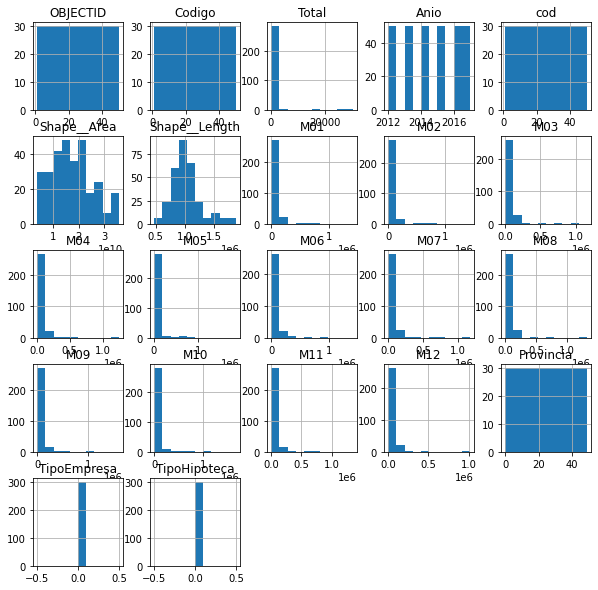

In [6]:
hist = df_emp_hip_encoder.hist(figsize=(10,10))

### Eliminar variables que no aportan valor al modelo

In [7]:
columnas_eliminar = ["OBJECTID","Codigo","cod","Provincia"]
df_emp_hip = DropColumns(columns=columnas_eliminar).fit_transform(df_emp_hip_encoder)
df_emp_hip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total          300 non-null    float64
 1   Anio           300 non-null    int64  
 2   Shape__Area    300 non-null    float64
 3   Shape__Length  300 non-null    float64
 4   M01            300 non-null    float64
 5   M02            300 non-null    float64
 6   M03            300 non-null    float64
 7   M04            300 non-null    float64
 8   M05            300 non-null    float64
 9   M06            300 non-null    float64
 10  M07            300 non-null    float64
 11  M08            300 non-null    float64
 12  M09            300 non-null    float64
 13  M10            300 non-null    float64
 14  M11            300 non-null    float64
 15  M12            300 non-null    float64
 16  TipoEmpresa    300 non-null    int64  
 17  TipoHipoteca   300 non-null    int64  
dtypes: float64

### Selección de la Variable a Predecir

In [8]:
col_target = 'Total'
columnas_modelo = [v for v in df_emp_hip.columns if v not in col_target]
features = df_emp_hip[columnas_modelo]
target = df_emp_hip[col_target] 

### Conjunto de entrenamiento y validación

Se separa las variables entre las columnas para realizar la predicción y la columna a predecir el clasificador por el grupo al que pertenece la venta de un inmueble

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=1234)

### Parametrización del algoritmo de clasificación

In [10]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

### Predicción del modelo

In [11]:
y_pred = regr.predict(X_test)
print(y_pred)

[  723.30065655   769.09052976   584.84620149   662.79391192
   584.84620149   608.19249396   584.84620149   584.84620149
   792.72580834 27321.85594841   584.84620149   584.84620149
  1046.84706739  2003.12189974   584.84620149 24278.56109127
   740.89730787   584.84620149 27281.20328175  1356.53073967
  1842.75251512   584.84620149  1582.78544711  2914.4190673
   584.84620149   917.72388585  1578.08690086   834.45224312
   584.84620149  1477.51879044   584.84620149  1535.24346268
   887.64158441   608.74220424   584.84620149  1674.9783417
  2464.89281712  1393.21672443  1404.70302014  1842.75251512
   584.84620149  1842.75251512 15555.28057089   584.84620149
   584.84620149   584.84620149   584.84620149  1302.4546852
  1022.0658436   1842.75251512  1842.75251512  1591.30209472
  1535.24346268   804.42381679   584.84620149  1448.89529942
  1075.23156191  1842.75251512   735.73013458   584.84620149]


### Métricas

In [12]:
print('MAE',mean_absolute_error(y_test, y_pred))
print('MSE',mean_squared_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MAE 488.8121311425376
MSE 1722847.7218733698
R2 0.9376589574597152


## Validación cruzada con 8 folds

In [13]:
def graficar_r2_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=1234)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("R2/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("R2")    
    train_scores = cross_val_score(estimator, train_x, train_y, cv = kfold, n_jobs=jobs,scoring="r2")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs,scoring="r2")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

array([0.6082691 , 0.97160056, 0.93051021, 0.60417945, 0.97871517,
       0.85687012, 0.6445612 , 0.90142357])

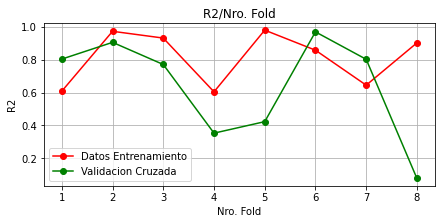

In [14]:
graficar_r2_scores(regr,X_train,y_train,X_test,y_test,nparts=8,jobs=2)

### Conclusiones

Luego se puede establecer que es posible estimar la cantidad de Empresas activas en un periodo en función de las hipotecas y ubicación geográfica. Se sugiere realizar una contrastación contra otros algoritmos y adicionalmente validar los resultados con juicios de expertos en el contexto que el problema este definido.